## My Research Question:
Historcial demographic voter bases have played a key mesaure in elections both federal and state, looking at demographics of race in the state of colorado by county compared to election results by county, are there any anoimlies we see in trends of votering demographic populations compared to election outcomes of counties? Looking at these trends can we see the entention of using population estimate by counties to understand the shift tide of Colorado politics in the coming years,as well. I wanted to pursue this question because I work over the summer in GIS systems to make maps of political districts for the Colorado state house and i wanted to know how big of an impact do voting base demographics play in the election and do we see anything that doesnt follow the trend of what we noramlly would see, hispanics mroe likely to democratic. What does this mean for the future of Colorado Politics and arguably the United States. 

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import pyproj
# from pyproj import CRS
import contextily, geoplot

import matplotlib.colors as colors

In [2]:
census_2010_18 = pd.read_csv("census_2010_18_filtered.csv")
census_2010_18['Percent Hispanic'] = census_2010_18['hispanic']/census_2010_18['pop']
census_2010_18['Percent White'] = census_2010_18['white_nh']/census_2010_18['pop']
census_2010_18['Percent Black'] = census_2010_18['black_nh']/census_2010_18['pop']
census_2010_18['Percent Native American'] = census_2010_18['ntvam_nh']/census_2010_18['pop']
census_2010_18['Percent Asian'] = census_2010_18['asian_nh']/census_2010_18['pop']
census_2010_18['Percent Male'] = census_2010_18['male']/census_2010_18['pop']
census_2010_18['Percent Female'] = census_2010_18['female']/census_2010_18['pop']

In [121]:
eleciton_2010_colorado_df = pd.read_excel('2010GeneralPrecinctResults.xlsx')
gov = eleciton_2010_colorado_df["Office/Question"] == "GOVERNOR/LIEUTENANT GOVERNOR"
dem_rep_can = eleciton_2010_colorado_df['Candidate/Yes or No'].isin(['John Hickenlooper / Joseph Garcia',"Tom Tancredo / Pat Miller"])
eleciton_2010_colorado_df = eleciton_2010_colorado_df[gov & dem_rep_can]

counties_2010_results_df = pd.pivot_table(data = eleciton_2010_colorado_df,
                                            index = 'County',
                                            columns = 'Candidate/Yes or No',
                                            values = 'Votes')

counties_2010_results_df['Total'] = counties_2010_results_df.sum(1)
counties_2010_results_df['non_dem_votes'] = counties_2010_results_df['Tom Tancredo / Pat Miller']/counties_2010_results_df['Total']
counties_2010_results_df = counties_2010_results_df.reset_index()
counties_2010_results_df['year'] = 2010
counties_2010_results_df.columns=["County","DEM_CAN","REP_CAN", "Total","gop_votes","year"]
counties_2010_results_df["County"] = counties_2010_results_df['County'].str.title()
counties_2010_results_df.head(1)

County     DEM_CAN    REP_CAN       Total  gop_votes  year
0  Adams  258.356481  207.12037  465.476852   0.444964  2010

In [120]:
eleciton_2012_colorado_df = pd.read_excel('2012GeneralPrecinctLevelResults.xlsx')
presdient = eleciton_2012_colorado_df["Office/Issue/Judgeship"] == "President/Vice President"
dem_rep_can = eleciton_2012_colorado_df['Candidate'].isin(['Barack Obama / Joe Biden','Mitt Romney / Paul Ryan'])
eleciton_2012_colorado_df = eleciton_2012_colorado_df[presdient&dem_rep_can]
counties_2012_results_df = pd.pivot_table(data = eleciton_2012_colorado_df,
                                            index = 'County',
                                            columns = 'Candidate',
                                            values = 'Candidate Votes')

counties_2012_results_df['Total'] = counties_2012_results_df.sum(1)
counties_2012_results_df['gop_votes'] = counties_2012_results_df['Mitt Romney / Paul Ryan']/counties_2012_results_df['Total']
counties_2012_results_df = counties_2012_results_df.reset_index()
counties_2012_results_df['year'] = 2012
counties_2012_results_df.columns=["County","DEM_CAN","GOP_CAN", "Total","gop_votes","year"]
counties_2012_results_df["County"] = counties_2012_results_df['County'].str.title()
counties_2012_results_df.head(1)

County     DEM_CAN     GOP_CAN       Total  gop_votes  year
0  Adams  400.992032  282.756972  683.749004   0.413539  2012

In [119]:
eleciton_2014_colorado_df = pd.read_excel('2014GeneralPrecinctResults.xlsx')
gov = eleciton_2014_colorado_df["Office/Issue/Judgeship"] == "Governor/Lieutenant Governor"
dem_rep_can = eleciton_2014_colorado_df['Candidate'].isin(['John Hickenlooper / Joe Garcia',"Bob Beauprez / Jill Repella"])
eleciton_2014_colorado_df = eleciton_2014_colorado_df[gov&dem_rep_can]

counties_2014_results_df = pd.pivot_table(data = eleciton_2014_colorado_df,
                                            index = 'County',
                                            columns = 'Candidate',
                                            values = 'Candidate Votes')

counties_2014_results_df['Total'] = counties_2014_results_df.sum(1)
counties_2014_results_df['gop_votes'] = counties_2014_results_df['Bob Beauprez / Jill Repella']/counties_2014_results_df['Total']
counties_2014_results_df = counties_2014_results_df.reset_index()
counties_2014_results_df['year'] = 2014
counties_2014_results_df.columns=["County","GOP_CAN","DEM_CAN", "Total","gop_votes","year"]
counties_2014_results_df["County"] = counties_2014_results_df['County'].str.title()
counties_2014_results_df.head(1)

County     GOP_CAN     DEM_CAN       Total  gop_votes  year
0  Adams  231.119522  260.756972  491.876494   0.469873  2014

In [118]:
eleciton_2016_colorado_df = pd.read_excel('co_2016_county_results.xlsx')
presdient = eleciton_2016_colorado_df["OFFICE / BALLOT ISSUE"] == "President/Vice President"
dem_rep_can = eleciton_2016_colorado_df['CANDIDATE / BALLOT ISSUE TITLE'].isin(['Hillary Clinton / Tim Kaine','Donald J. Trump / Michael R. Pence'])
eleciton_2016_colorado_df = eleciton_2016_colorado_df[presdient&dem_rep_can]
counties_2016_results_df = pd.pivot_table(data = eleciton_2016_colorado_df,
                                            index = 'COUNTY',
                                            columns = 'CANDIDATE / BALLOT ISSUE TITLE',
                                            values = 'YES VOTES')

counties_2016_results_df['Total'] = counties_2016_results_df.sum(1)
counties_2016_results_df['gop_votes'] = counties_2016_results_df['Donald J. Trump / Michael R. Pence']/counties_2016_results_df['Total']
counties_2016_results_df = counties_2016_results_df.reset_index()
counties_2016_results_df['year'] = 2016
counties_2016_results_df.columns=["County","GOP_CAN","DEM_CAN", "Total","gop_votes","year"]
counties_2016_results_df["County"] = counties_2016_results_df['County'].str.title()
counties_2016_results_df.head(1)

County  GOP_CAN  DEM_CAN   Total  gop_votes  year
0  Adams    80082    96558  176640   0.453363  2016

In [117]:
eleciton_2018_colorado_df = pd.read_excel('2018GeneralResults.xlsx')
gov = eleciton_2018_colorado_df["OFFICE/BALLOT ISSUE NUMBER"] == "Governor/Lieutenant Governor"
dem_rep_can = eleciton_2018_colorado_df['CANDIDATE/JUDGE/BALLOT TITLE'].isin(['Jared Polis / Dianne Primavera','Walker Stapleton / Lang Sias'])
eleciton_2018_colorado_df = eleciton_2018_colorado_df[gov&dem_rep_can]
eleciton_2018_colorado_df["YES VOTES"] = eleciton_2018_colorado_df["YES VOTES"].astype(str).astype(int)
counties_2018_results_df = pd.pivot_table(data = eleciton_2018_colorado_df,
                                            index = 'COUNTY',
                                            columns = 'CANDIDATE/JUDGE/BALLOT TITLE',
                                            values = 'YES VOTES')

counties_2018_results_df['Total'] = counties_2018_results_df.sum(1)
counties_2018_results_df['gop_votes'] = counties_2018_results_df['Walker Stapleton / Lang Sias']/counties_2018_results_df['Total']
counties_2018_results_df = counties_2018_results_df.reset_index()
counties_2018_results_df['year'] = 2018
counties_2018_results_df.columns=["County","DEM_CAN","REP_CAN", "Total","gop_votes","year"]
counties_2018_results_df["County"] = counties_2018_results_df['County'].str.title()
counties_2018_results_df.head(1)

County  DEM_CAN  REP_CAN   Total  gop_votes  year
0  Adams    93449    69465  162914   0.426391  2018

In [116]:
eleciton_2020_colorado_df = pd.read_excel('co_2020_county_results.xlsx',
                                       sheet_name=238,
                                       skiprows=[0,1])
eleciton_2020_colorado_df = eleciton_2020_colorado_df.drop(columns=["Total Votes.1" , "Total Votes.2", "Total Votes.3","Registered Voters"])
eleciton_2020_colorado_df['dem_share'] = eleciton_2020_colorado_df['Total Votes']/eleciton_2020_colorado_df['Total']
eleciton_2020_colorado_df['gop_share'] = 1-eleciton_2020_colorado_df['dem_share']
eleciton_2020_colorado_df['year'] = 2020
eleciton_2020_colorado_df.columns=["County","DEM_CAN","Total","DEM_share","gop_votes","year"]
eleciton_2020_colorado_df.head(1)

County  DEM_CAN   Total  DEM_share  gop_votes  year
0  Adams   108273  209908   0.515812   0.484188  2020

In [115]:
election_resutls_2010_2020 = pd.concat([counties_2010_results_df,counties_2012_results_df,counties_2014_results_df,counties_2018_results_df,counties_2016_results_df,eleciton_2020_colorado_df],sort=True)
eleciton_by_year = pd.pivot_table(election_resutls_2010_2020,columns=['year','County'],values=["gop_votes"])
eleciton_by_year = pd.DataFrame(eleciton_by_year)
eleciton_by_year = eleciton_by_year.reset_index()
eleciton_by_year = eleciton_by_year.drop(columns="level_0")
eleciton_by_year.columns=["year","County","Gop_votes"]
eleciton_by_year.head(1)

year County  Gop_votes
0  2010  Adams   0.444964

In [114]:
co_counties_gdf = gpd.read_file('Colorado Counties/')
co_counties_gdf['county'] = co_counties_gdf['county'].str.title()
co_counties_gdf =co_counties_gdf.filter(items=["county",'geometry'])
co_counties_gdf.head(1)

county                                           geometry
0  Adams  POLYGON ((-103.70574 39.99991, -103.70569 39.9...

In [113]:
election_gdf = pd.merge(left = co_counties_gdf,
                       right = eleciton_by_year,
                       how = 'left',
                       left_on = 'county',
                       right_on = 'County', 
                      )

election_gdf = election_gdf.drop(columns=["county","County"])
election_gdf.head(1)

geometry  year  Gop_votes
0  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010   0.444964

In [112]:
census_2010_18_gdf = pd.merge(left = co_counties_gdf,
                       right = census_2010_18,
                       how = 'outer',
                       left_on = 'county',
                       right_on = 'geoname',
                      )

census_2010_18_gdf['year'] = pd.to_datetime(census_2010_18_gdf['year'])
census_2010_18_gdf['year'] =census_2010_18_gdf['year'].apply(lambda x:x.year)
census_2010_18_gdf.head(1)

county                                           geometry  year geoname  \
0  Adams  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010   Adams   

      pop  hispanic  white_nh  black_nh  ntvam_nh  asian_nh    male  female  \
0  441603    167878    234970     12207      2478     15431  222142  219461   

   Percent Hispanic  Percent White  Percent Black  Percent Native American  \
0          0.380156       0.532084       0.027642                 0.005611   

   Percent Asian  Percent Male  Percent Female  
0       0.034943      0.503036        0.496964

In [122]:
maptime = pd.pivot_table(census_2010_18_gdf,columns=['year','geoname'],values=["Percent Hispanic"])
by_year_county_hispanic = pd.DataFrame(maptime)
by_year_county_hispanic = by_year_county_hispanic.reset_index()
by_year_county_hispanic = by_year_county_hispanic.drop(columns="level_0")
by_year_county_hispanic.columns=["year","geoname","Percent Hispanic"]
by_year_county_hispanic.head(1)

year geoname  Percent Hispanic
0  2010   Adams          0.380156

In [123]:
maptime = pd.pivot_table(census_2010_18_gdf,columns=['year','geoname'],values=["Percent Female"])
by_year_county_female = pd.DataFrame(maptime)
by_year_county_female = by_year_county_female.reset_index()
by_year_county_female = by_year_county_female.drop(columns="level_0")
by_year_county_female.columns=["year","geoname","Percent Female"]
by_year_county_female.head()
female_gdf = pd.merge(left = co_counties_gdf,
                       right = by_year_county_female,
                       how = 'left',
                       left_on = 'county',
                       right_on = 'geoname', 
                      )
female_gdf = female_gdf.drop(columns=["county","geoname"])
female_gdf.head(1)

geometry  year  Percent Female
0  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010        0.496964

In [124]:
hispanic_gdf = pd.merge(left = co_counties_gdf,
                       right = by_year_county_hispanic,
                       how = 'left',
                       left_on = 'county',
                       right_on = 'geoname', 
                      )
hispanic_gdf = hispanic_gdf.drop(columns=["county","geoname"])
hispanic_gdf.head(1)

geometry  year  Percent Hispanic
0  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010          0.380156

In [125]:
#new table 
maptime = pd.pivot_table(census_2010_18_gdf,columns=['year','geoname'],values=["Percent White"])
by_year_county_white = pd.DataFrame(maptime)
by_year_county_white = by_year_county_white.reset_index()
by_year_county_white = by_year_county_white.drop(columns="level_0")
by_year_county_white.columns=["year","geoname","Percent White"]
by_year_county_white.head()
white_gdf = pd.merge(left = co_counties_gdf,
                       right = by_year_county_white,
                       how = 'left',
                       left_on = 'county',
                       right_on = 'geoname', 
                      )
white_gdf = white_gdf.drop(columns=["county","geoname"])
white_gdf.head(1)

geometry  year  Percent White
0  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010       0.532084

In [126]:
# new table 
maptime = pd.pivot_table(census_2010_18_gdf,columns=['year','geoname'],values=["Percent Native American"])
by_year_county_NA = pd.DataFrame(maptime)
by_year_county_NA = by_year_county_NA.reset_index()
by_year_county_NA = by_year_county_NA.drop(columns="level_0")
by_year_county_NA.columns=["year","geoname","Percent Native American"]
by_year_county_NA.head()
NA_gdf = pd.merge(left = co_counties_gdf,
                       right = by_year_county_NA,
                       how = 'left',
                       left_on = 'county',
                       right_on = 'geoname', 
                      )
NA_gdf = NA_gdf.drop(columns=["county","geoname"])
NA_gdf.head(1)

geometry  year  \
0  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010   

   Percent Native American  
0                 0.005611

In [127]:
# new table 
maptime = pd.pivot_table(census_2010_18_gdf,columns=['year','geoname'],values=["Percent Asian"])
by_year_county_A = pd.DataFrame(maptime)
by_year_county_A = by_year_county_A.reset_index()
by_year_county_A = by_year_county_A.drop(columns="level_0")
by_year_county_A.columns=["year","geoname","Percent Asian"]
by_year_county_A.head()
Asian_gdf = pd.merge(left = co_counties_gdf,
                       right = by_year_county_A,
                       how = 'left',
                       left_on = 'county',
                       right_on = 'geoname', 
                      )
Asian_gdf = Asian_gdf.drop(columns=["county","geoname"])
Asian_gdf.head(1)

geometry  year  Percent Asian
0  POLYGON ((-103.70574 39.99991, -103.70569 39.9...  2010       0.034943

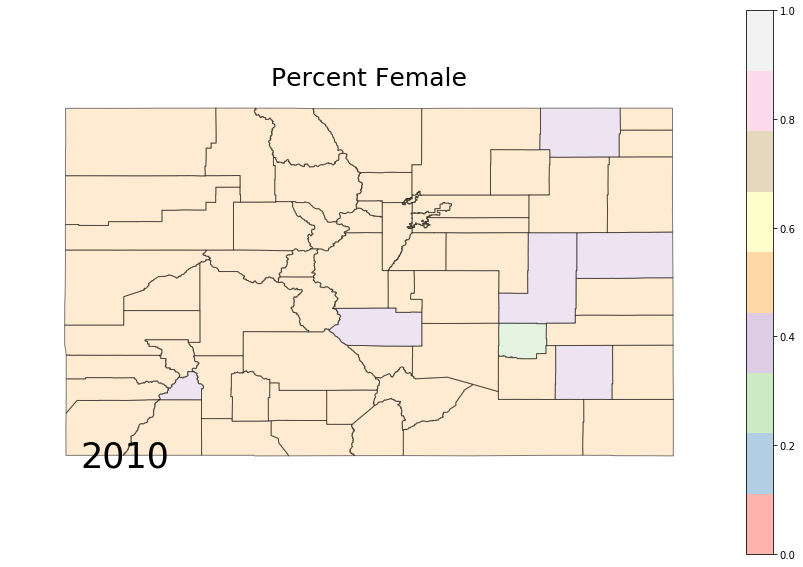

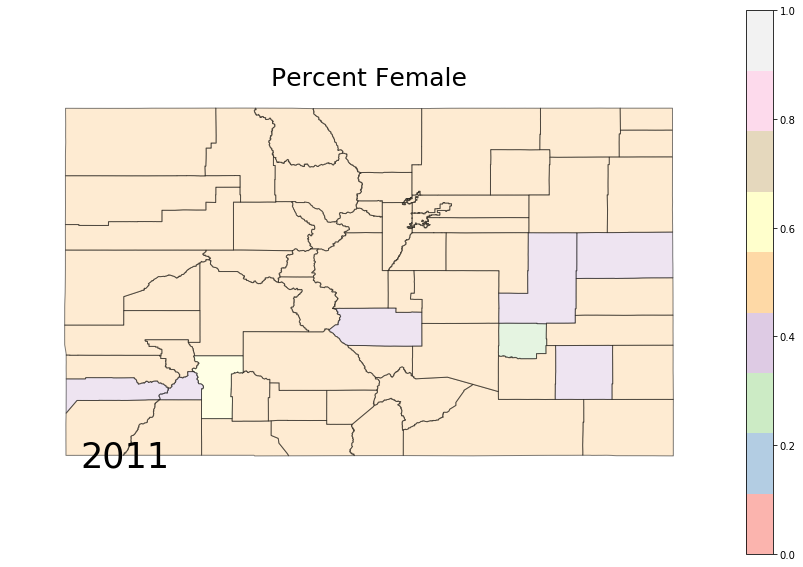

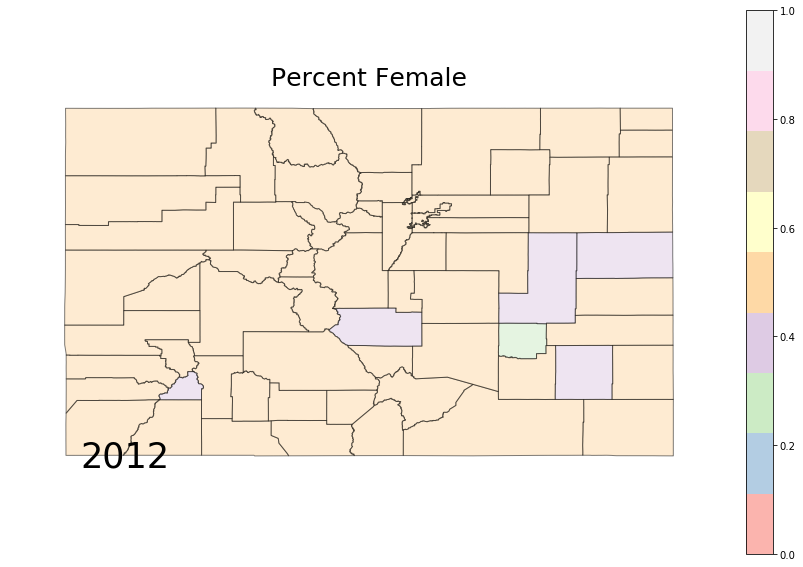

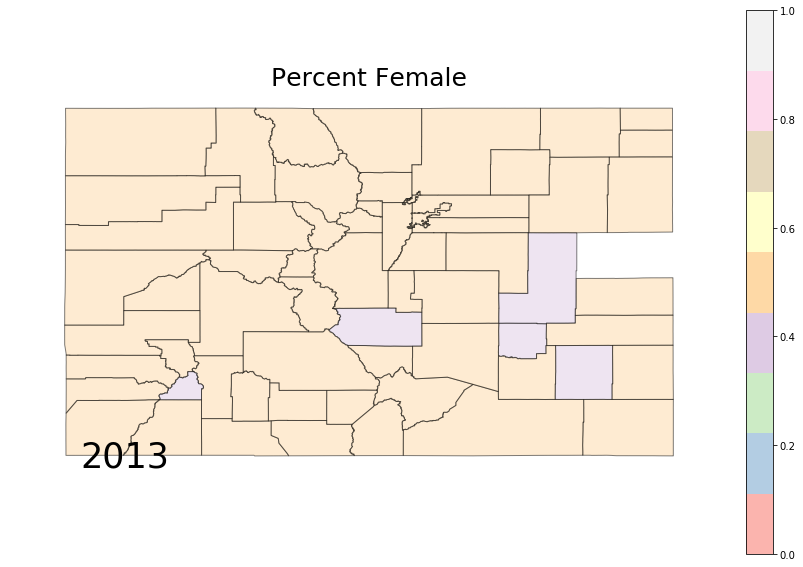

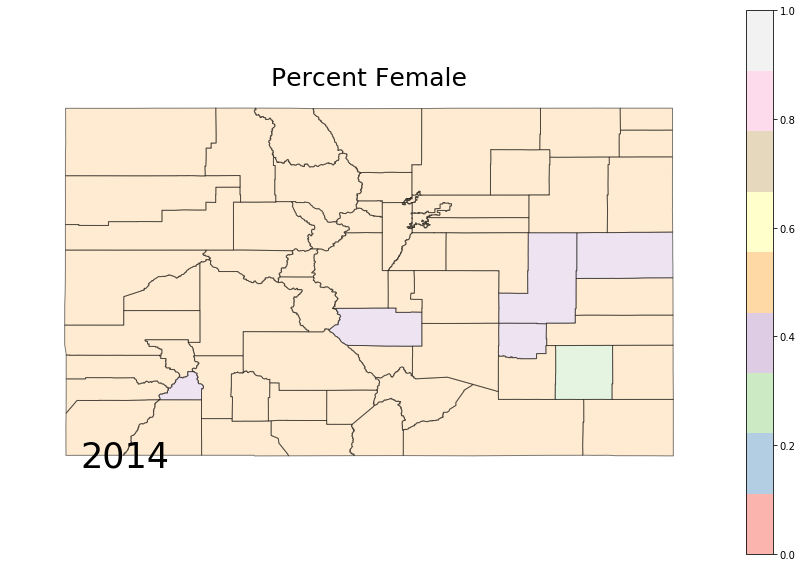

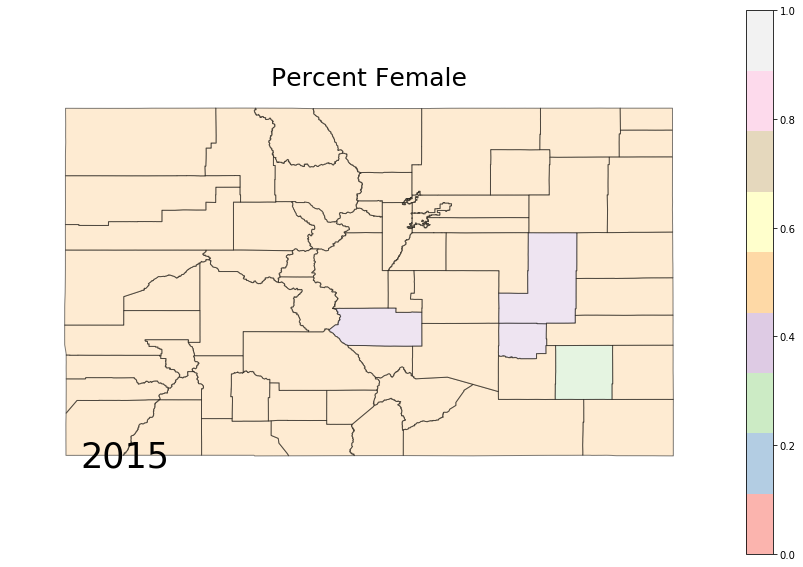

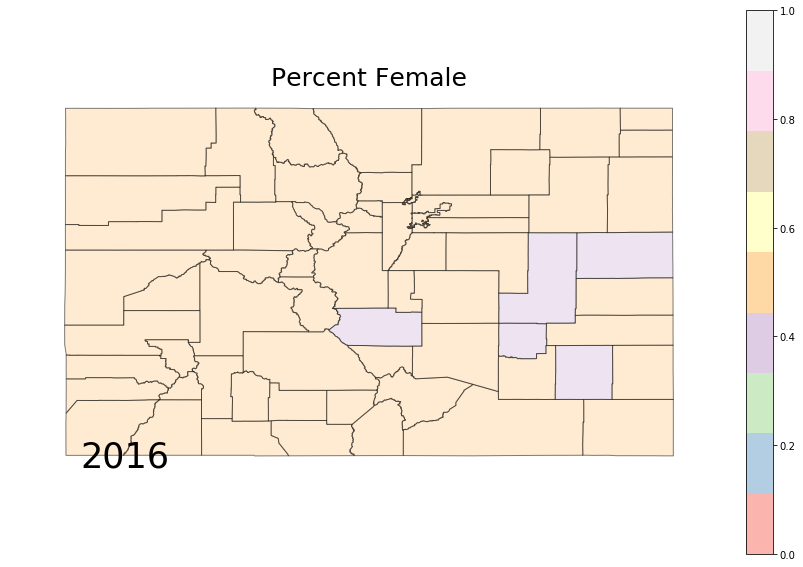

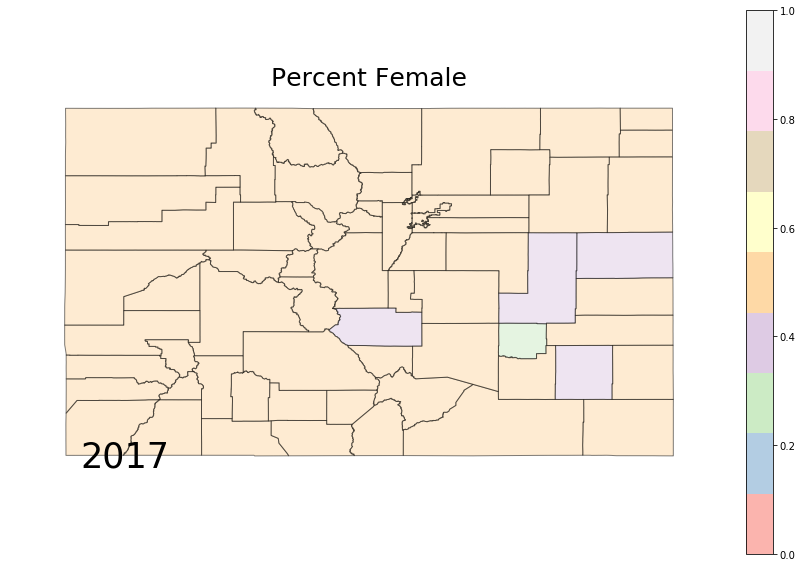

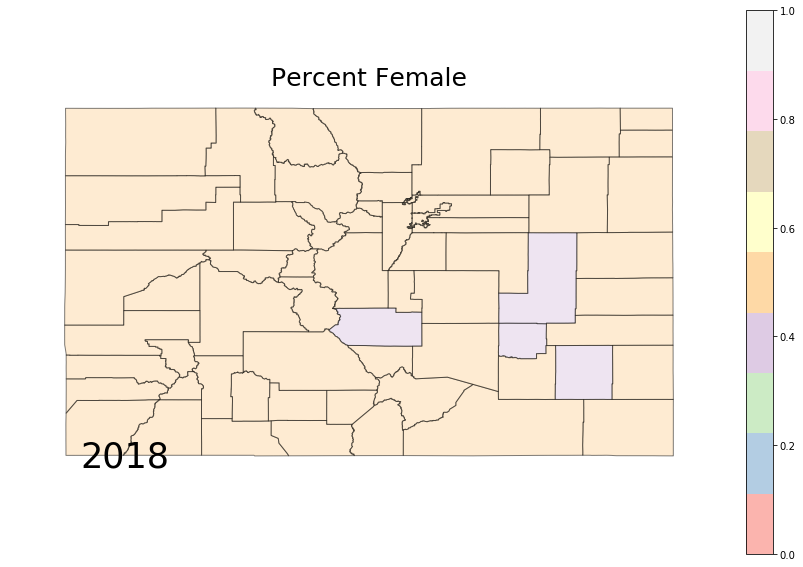

In [86]:
list_of_years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    year_new_F = female_gdf[female_gdf["year"]==year]
    f,ax = plt.subplots(figsize=(15,10))
    fig = year_new_F.plot(column = 'Percent Female',
                        cmap = 'Pastel1',
                        legend = True,
                        vmin = 0,
                        vmax = 1.0,
                        edgecolor = 'k',
                        alpha = .5,
                        ax=ax)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Percent Female', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # create an annotation for the year by grabbing the first 4 digits
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    plt.savefig('Female'+str(year)+'.png')

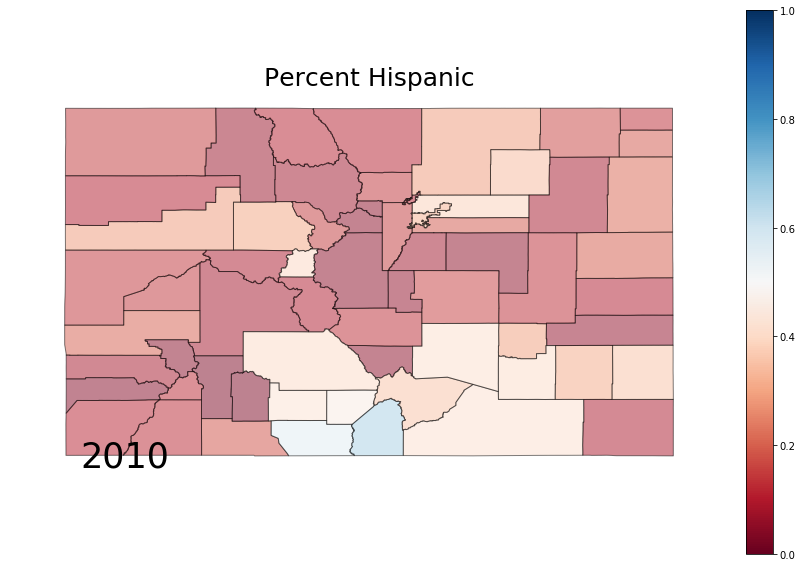

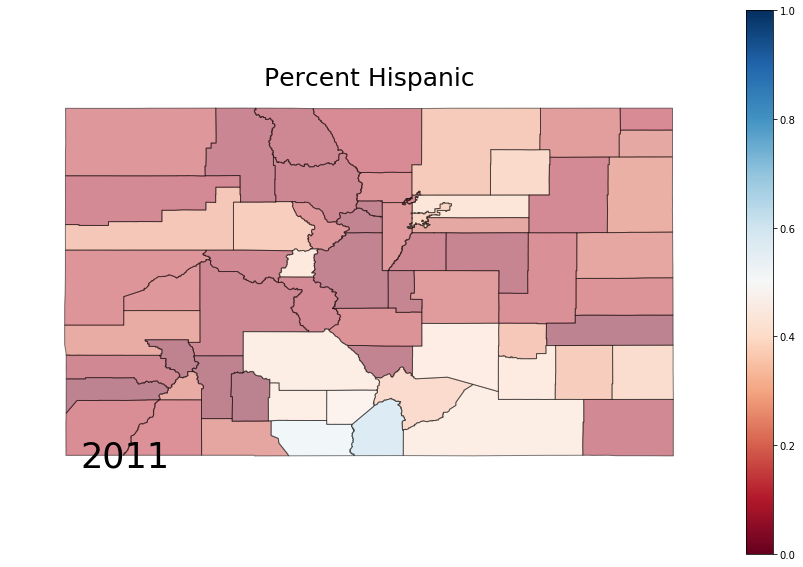

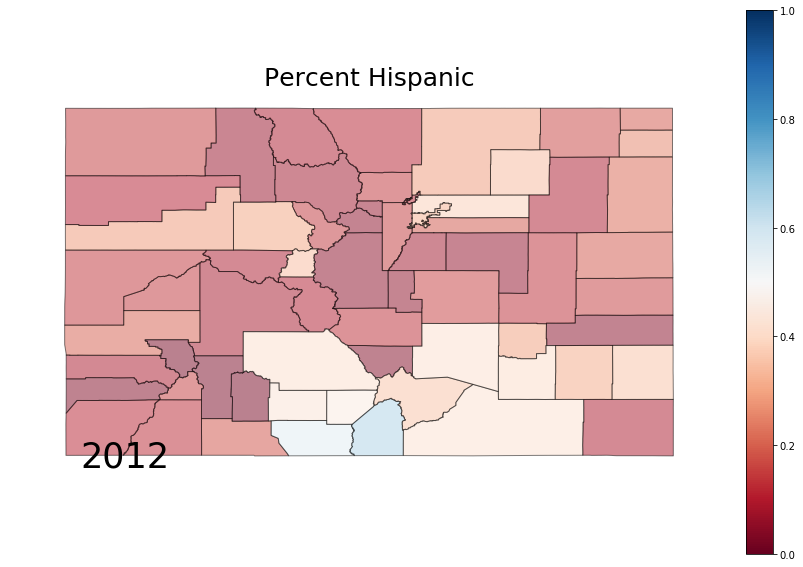

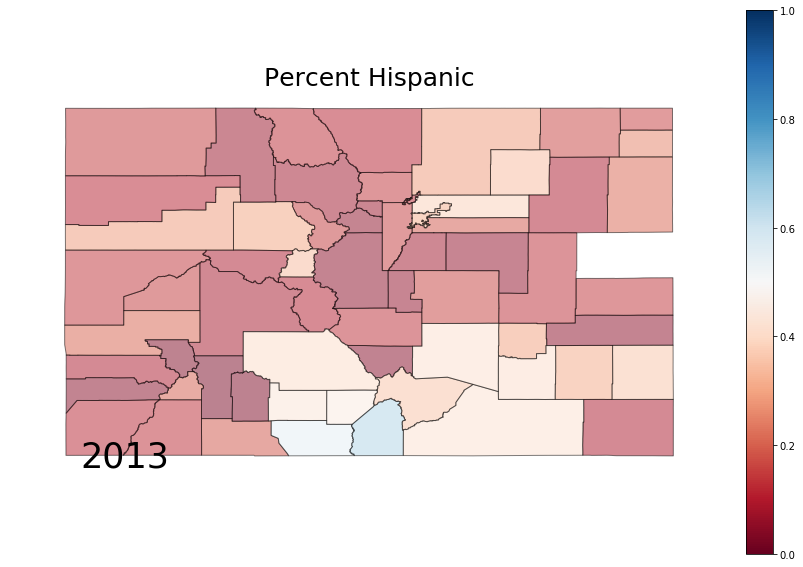

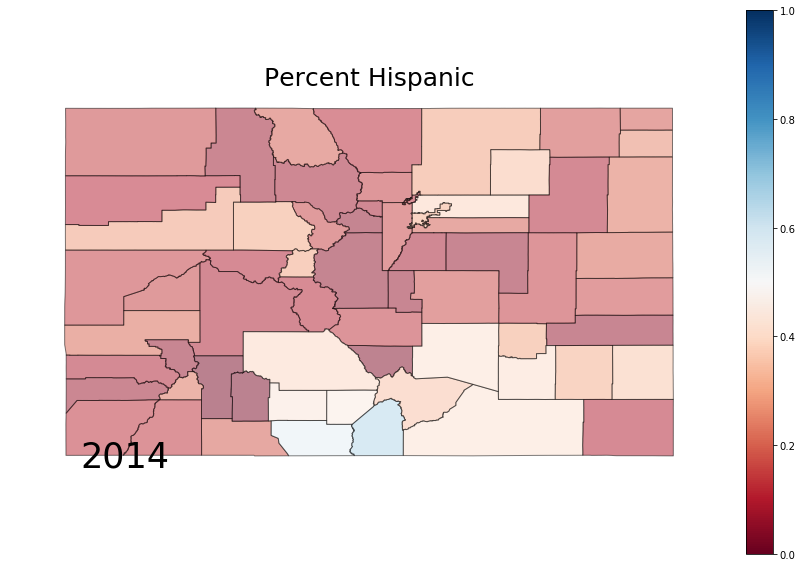

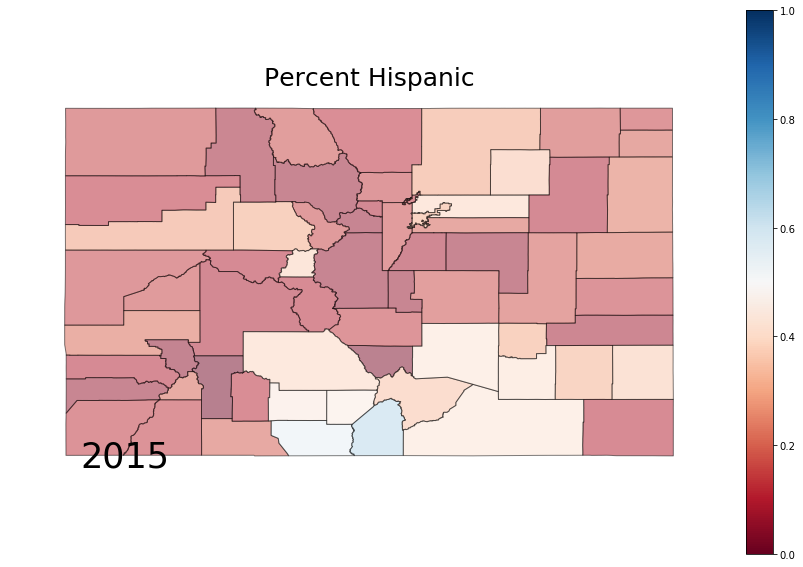

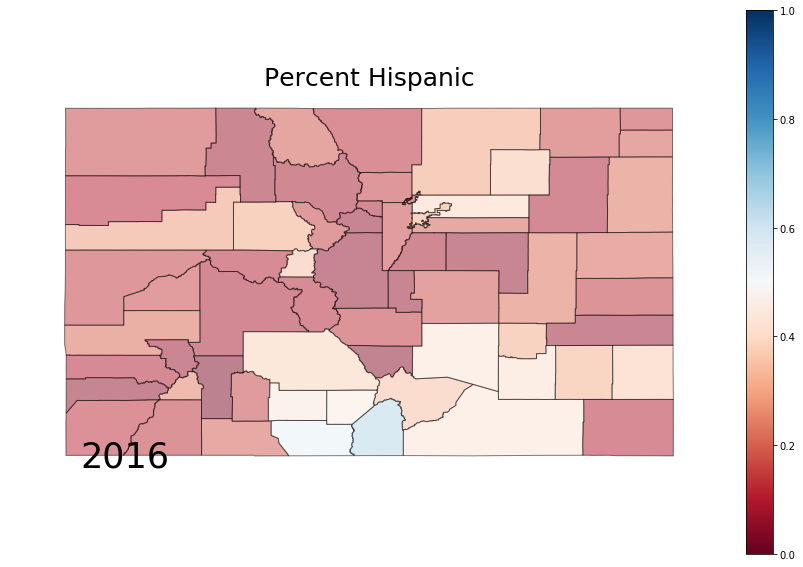

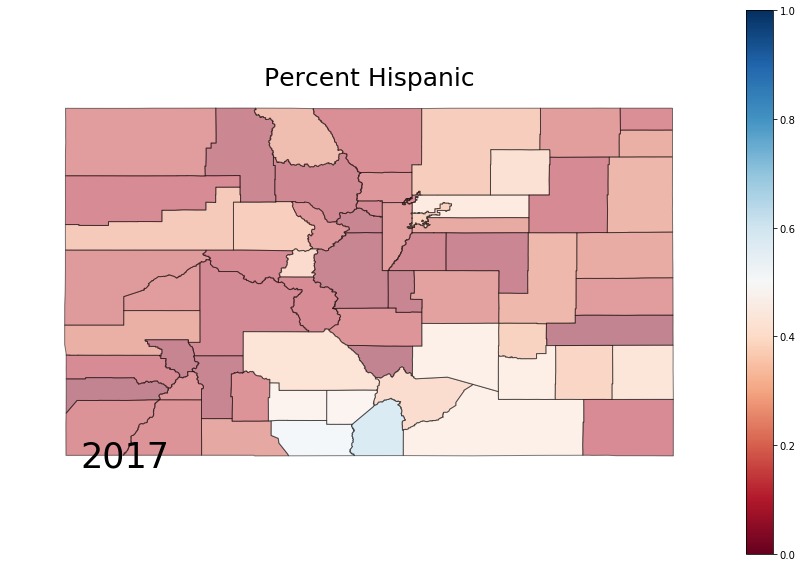

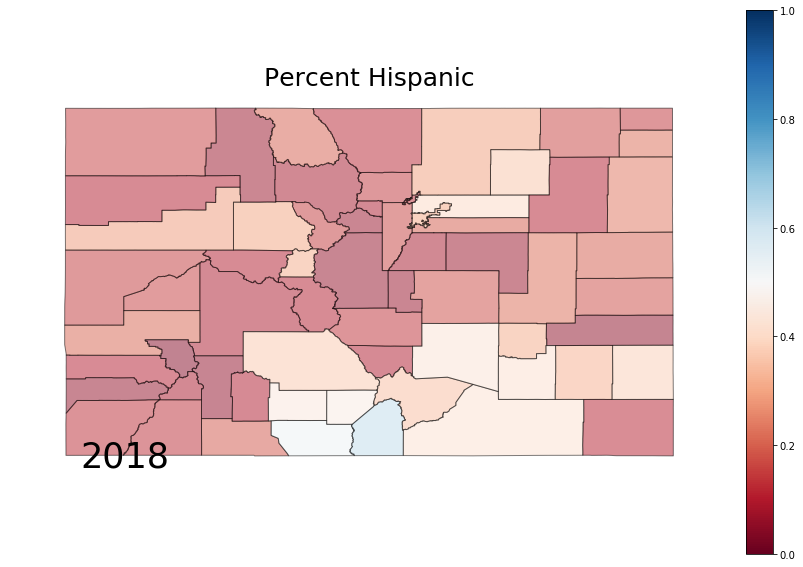

In [87]:
list_of_years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    year_new_H = hispanic_gdf[hispanic_gdf["year"]==year]
    f,ax = plt.subplots(figsize=(15,10))
    fig = year_new_H.plot(column = 'Percent Hispanic',
                        cmap = 'RdBu',
                        legend = True,
                        vmin = 0,
                        vmax = 1.0,
                        edgecolor = 'k',
                        alpha = .5,
                        ax=ax)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Percent Hispanic', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # create an annotation for the year by grabbing the first 4 digits
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    plt.savefig('Hispanic'+str(year)+'.png')

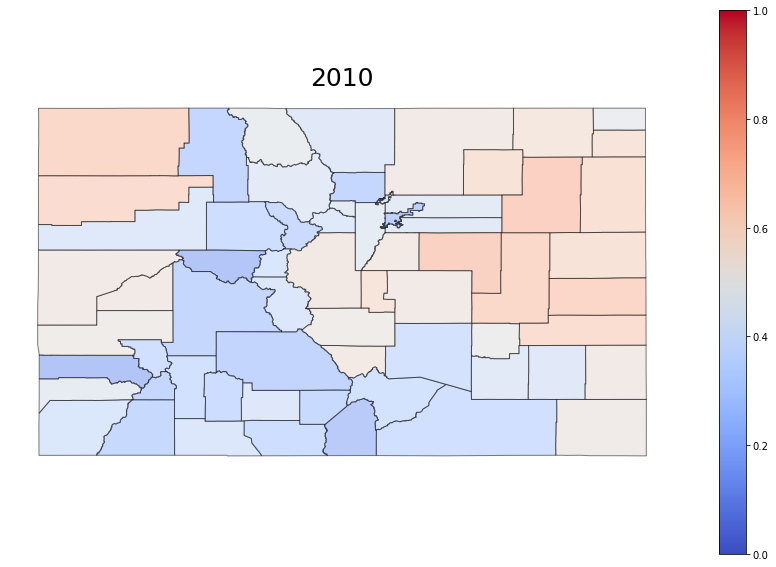

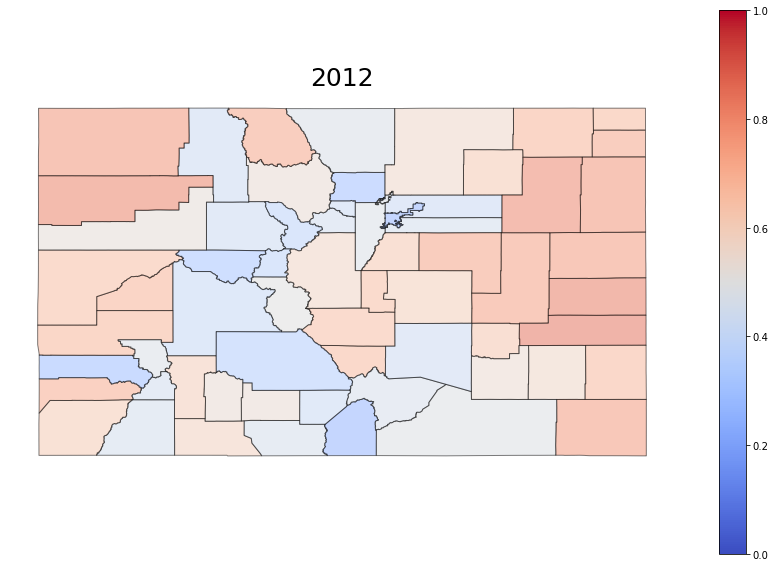

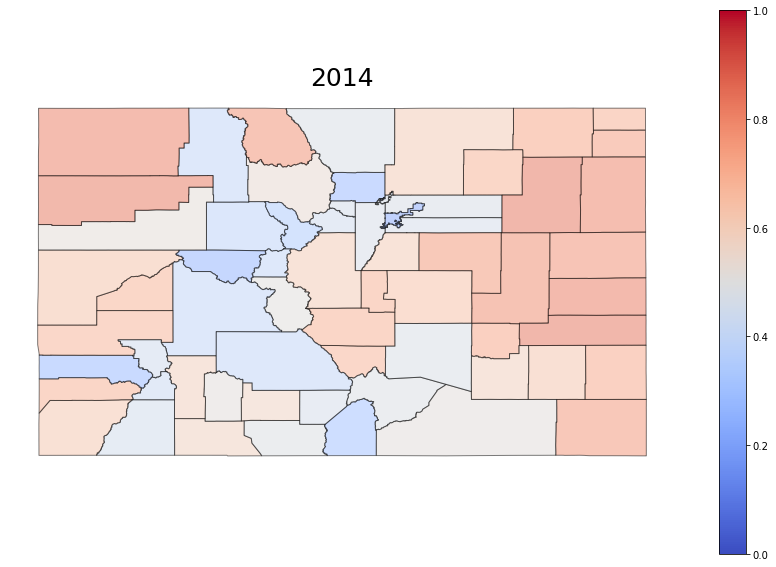

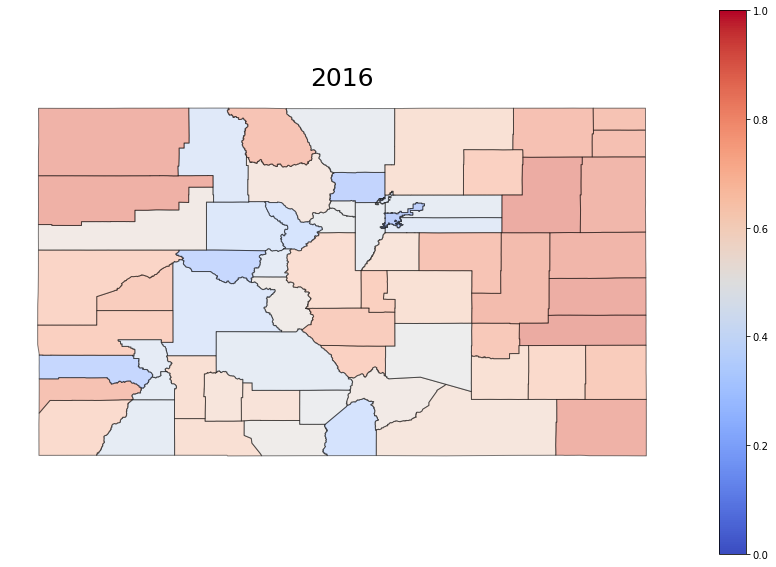

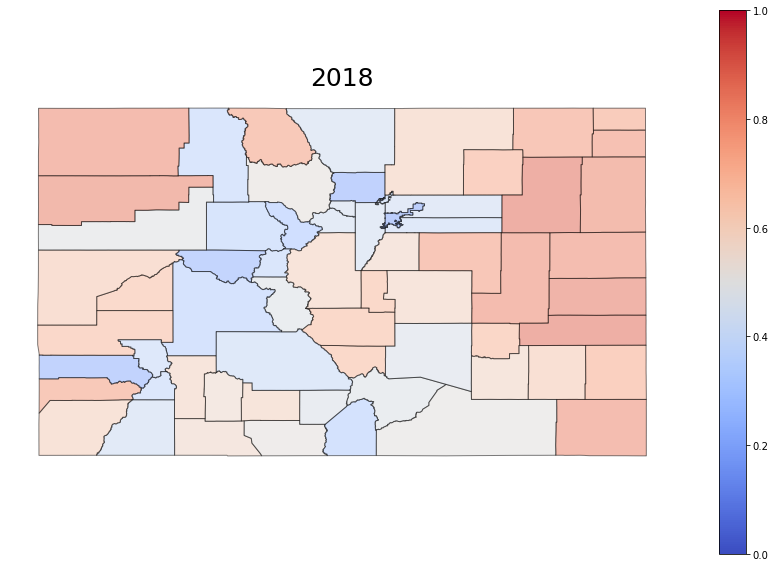

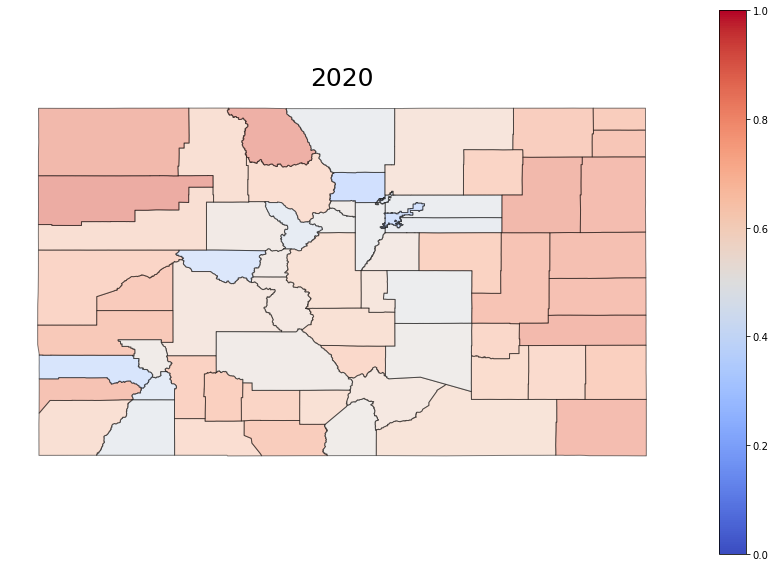

In [82]:
years = [2010,2012,2014,2016,2018,2020]

for year in years:
    year_new = election_gdf[election_gdf["year"]==year]
    f,ax = plt.subplots(figsize=(15,10))
    fig = year_new.plot(column = 'Gop_votes',
                        cmap = 'coolwarm',
                        legend = True,
                        vmin = 0,
                        vmax = 1.0,
                        edgecolor = 'k',
                        alpha = .5,
                        ax=ax)
    fig.axis('off')
    
    # add a title
    fig.set_title(year,
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    plt.savefig(''+str(year)+'.png')

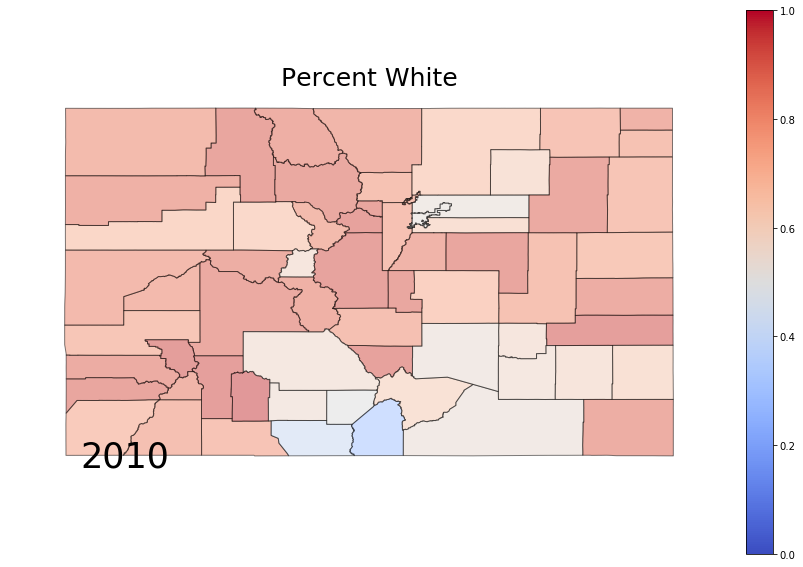

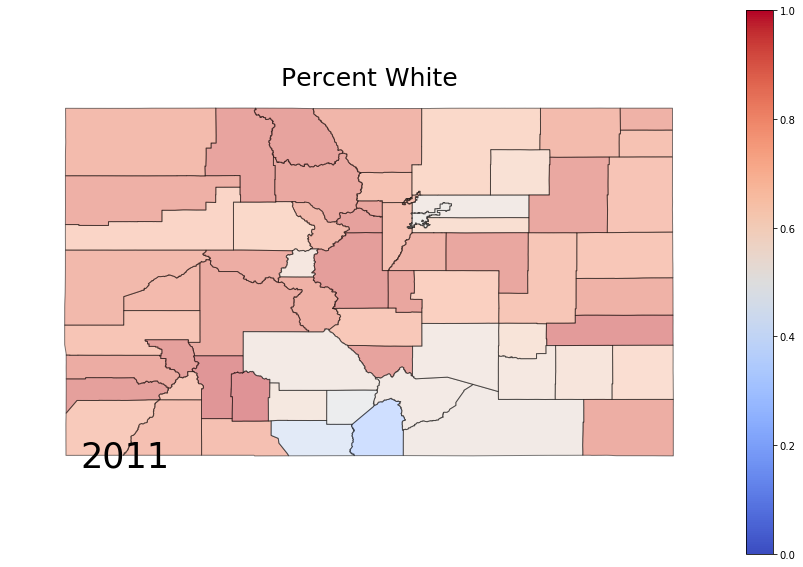

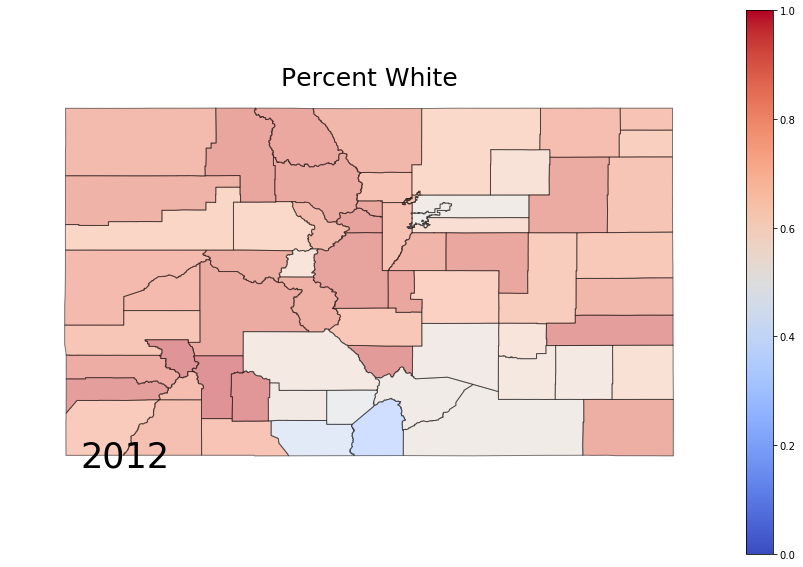

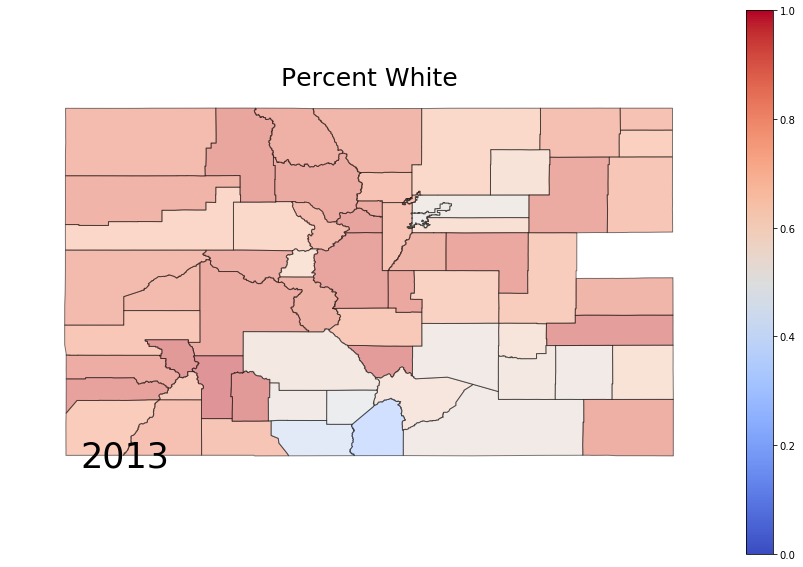

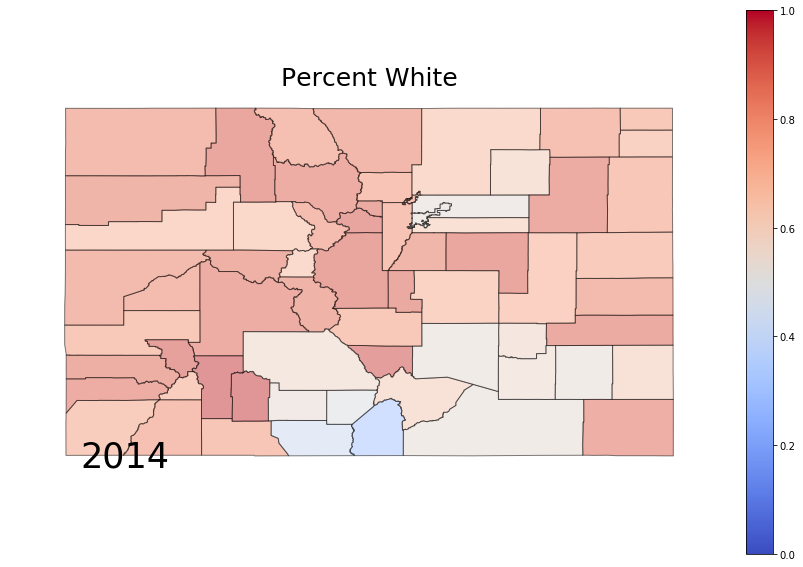

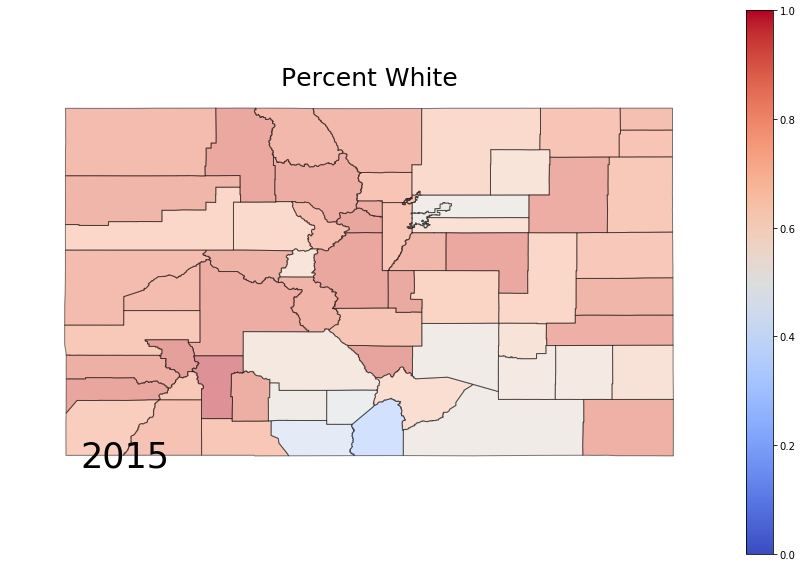

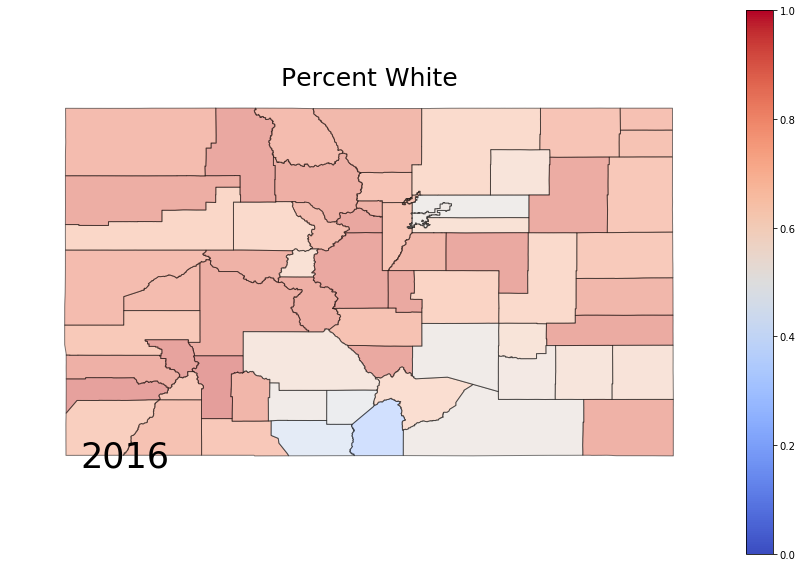

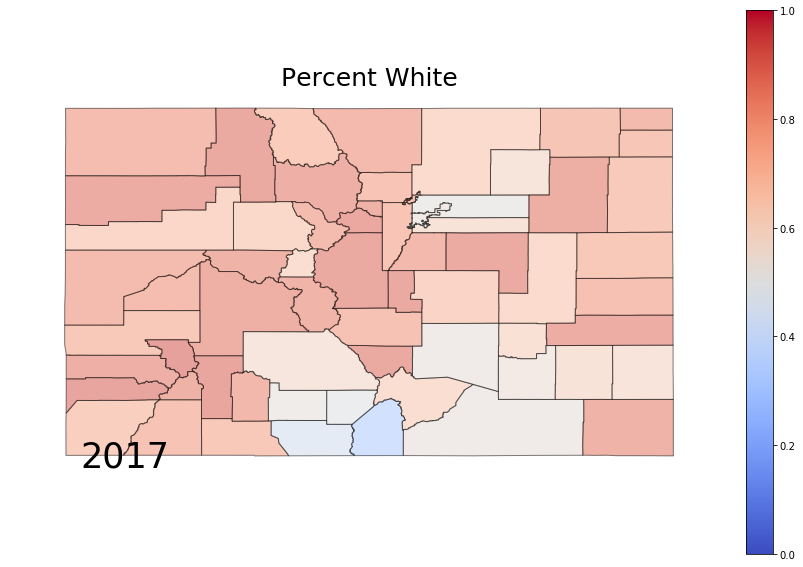

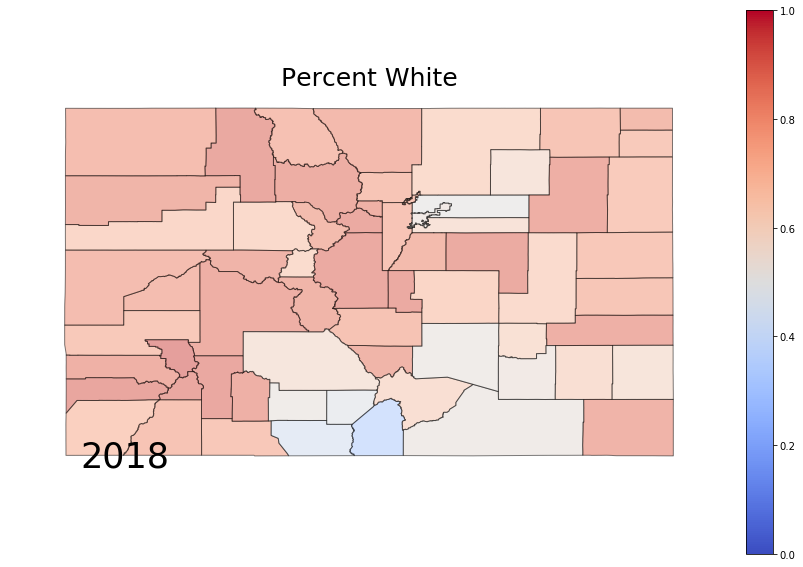

In [100]:
# New visual 
list_of_years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    year_new_W = white_gdf[white_gdf["year"]==year]
    f,ax = plt.subplots(figsize=(15,10))
    fig = year_new_W.plot(column = 'Percent White',
                        cmap = 'coolwarm',
                        legend = True,
                        vmin = 0,
                        vmax = 1.0,
                        edgecolor = 'k',
                        alpha = .5,
                        ax=ax)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Percent White', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # create an annotation for the year by grabbing the first 4 digits
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    plt.savefig('White'+str(year)+'.png')

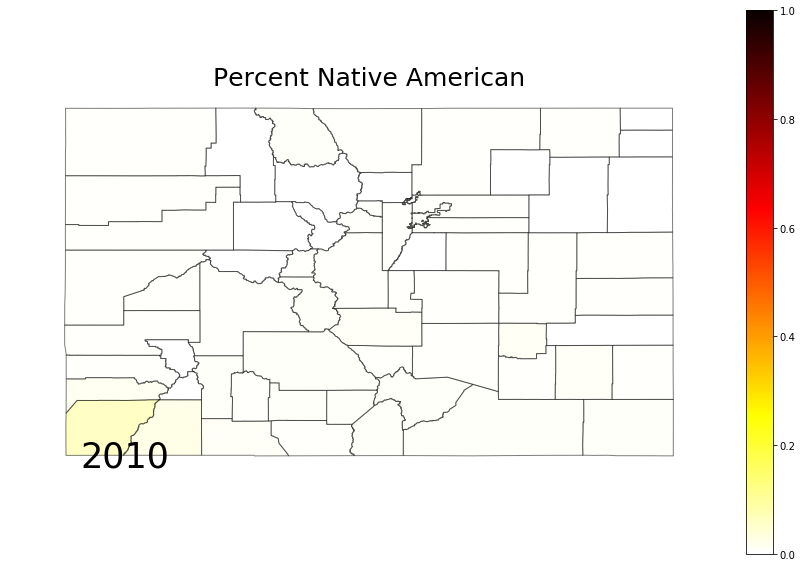

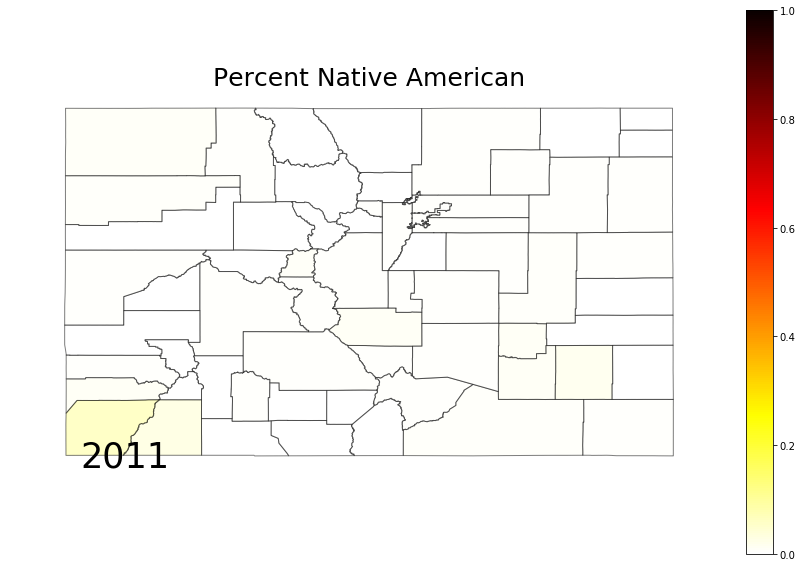

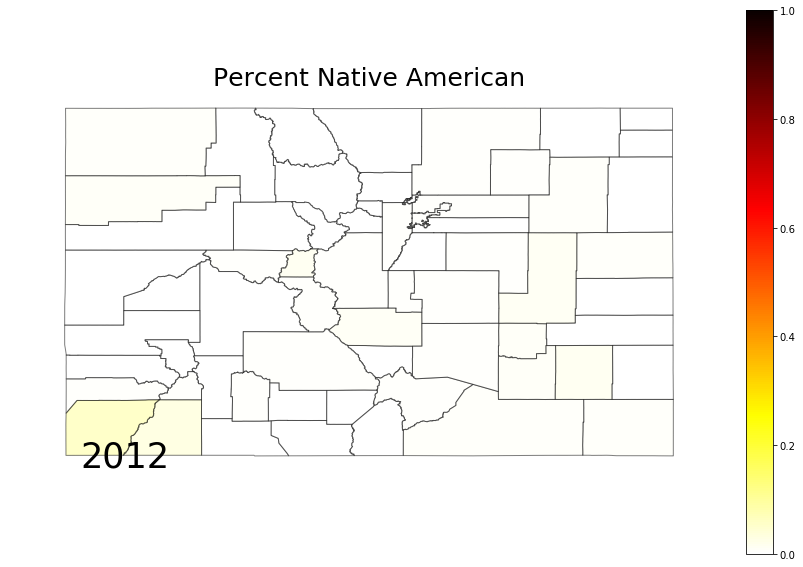

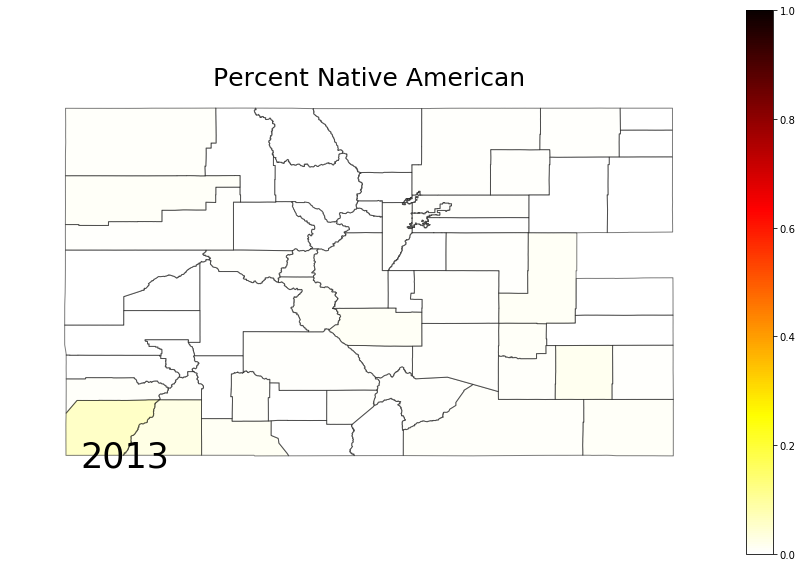

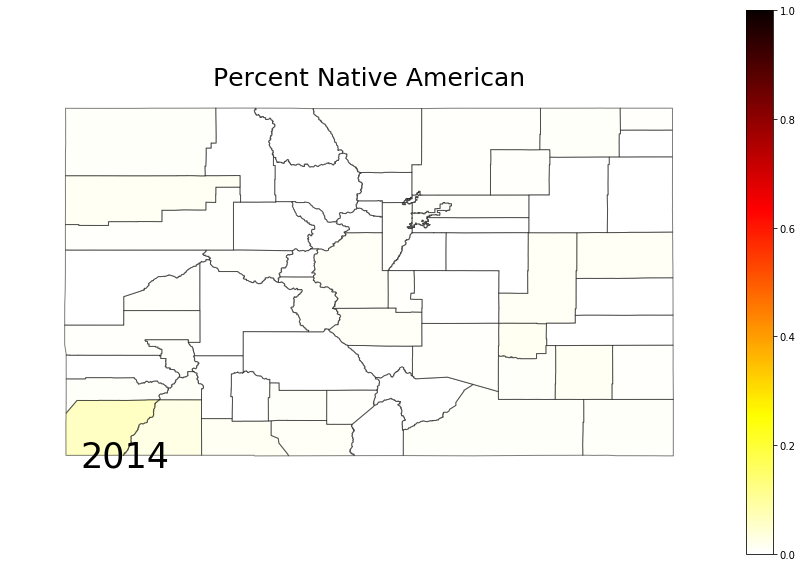

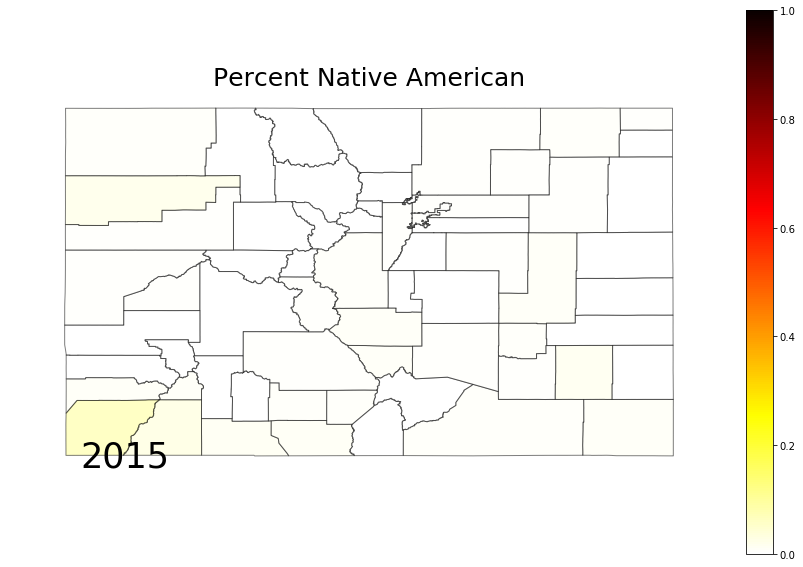

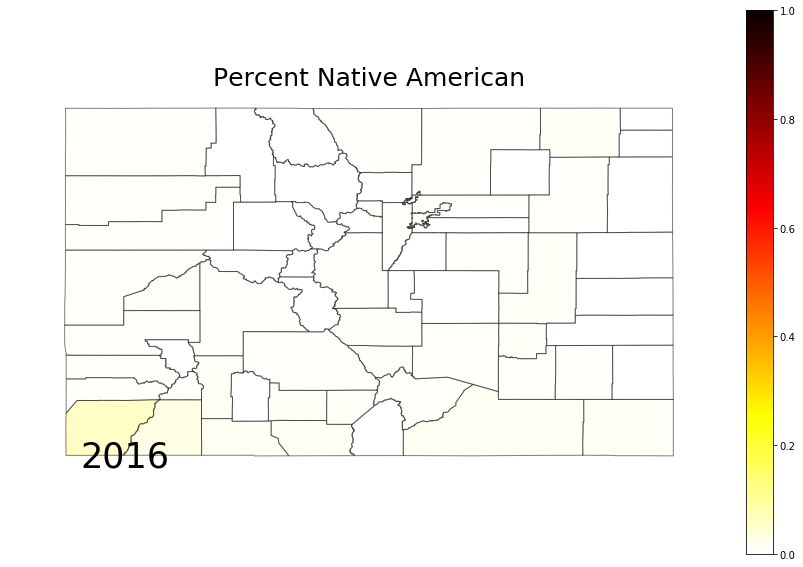

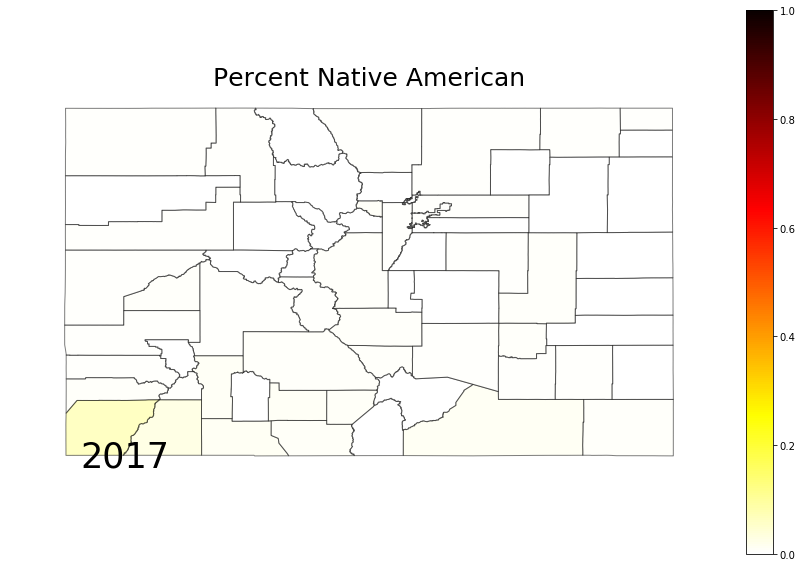

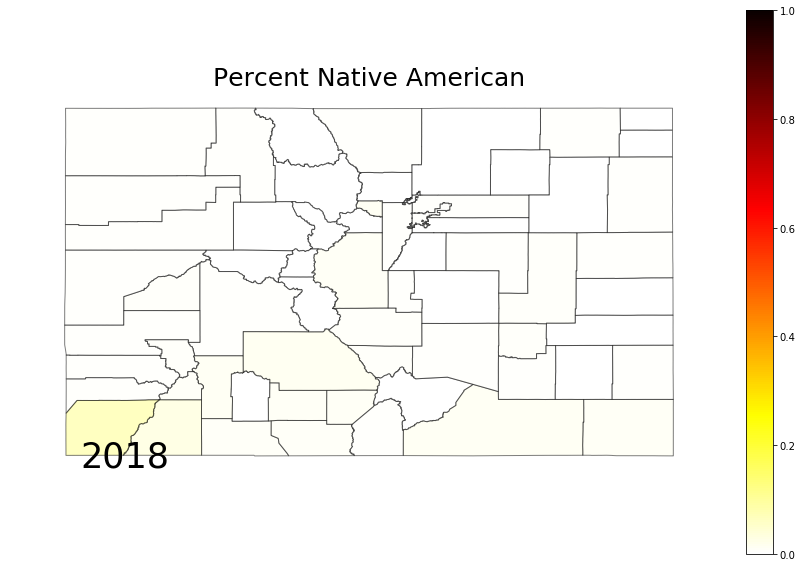

In [105]:
# New visual 
list_of_years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    year_new_NA = NA_gdf[NA_gdf["year"]==year]
    f,ax = plt.subplots(figsize=(15,10))
    fig = year_new_NA.plot(column = 'Percent Native American',
                        cmap = 'hot_r',
                        legend = True,
                        vmin = 0,
                        vmax = 1.0,
                        edgecolor = 'k',
                        alpha = .5,
                        ax=ax)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Percent Native American', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # create an annotation for the year by grabbing the first 4 digits
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    plt.savefig('Native American'+str(year)+'.png')

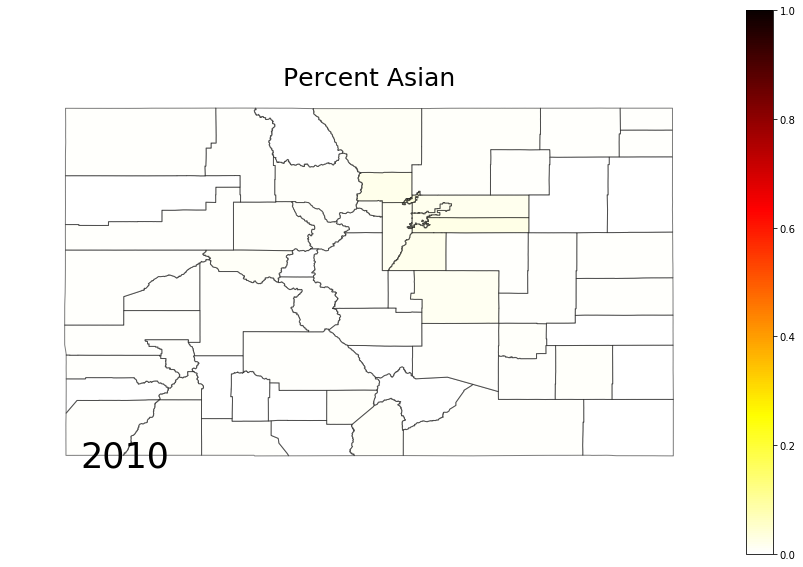

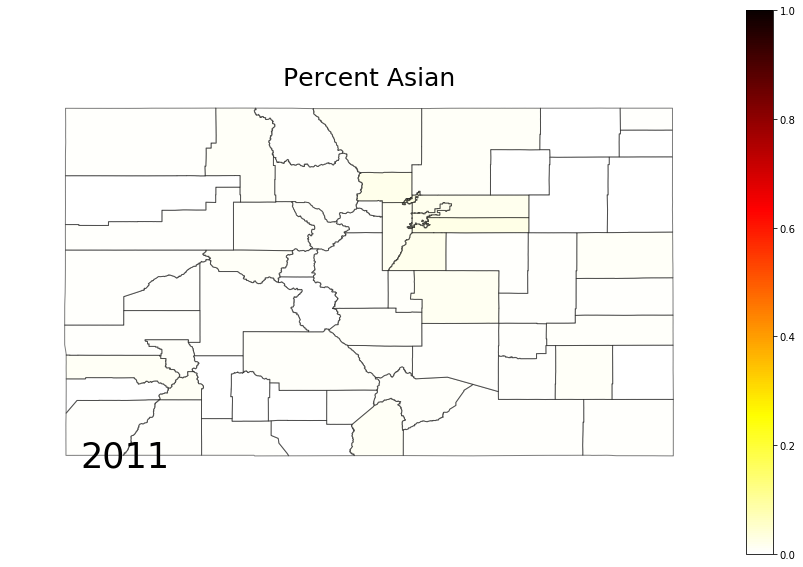

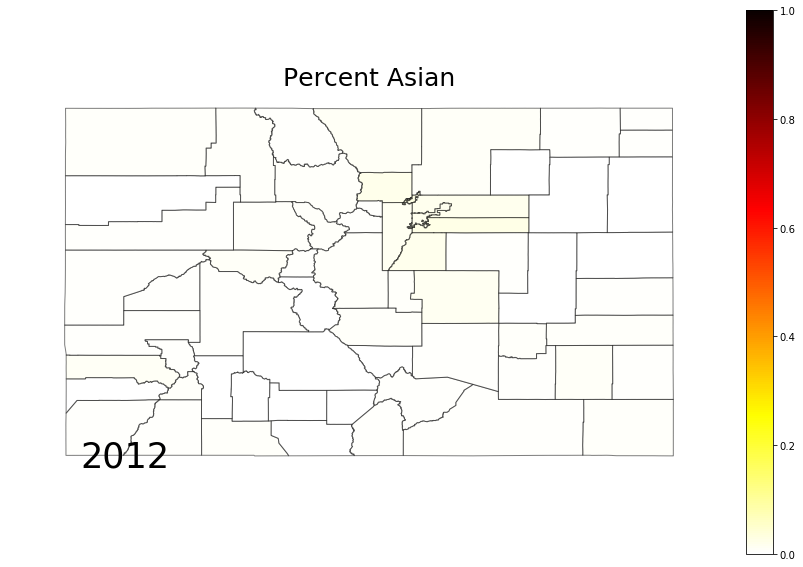

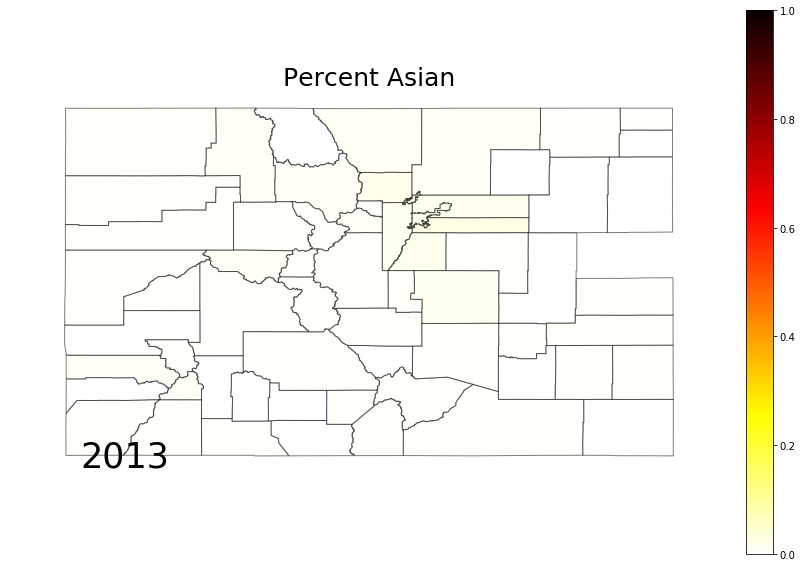

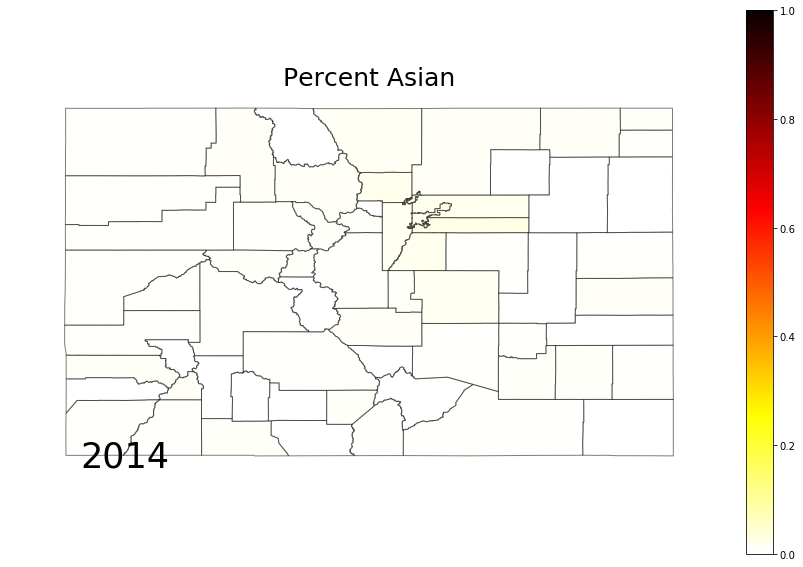

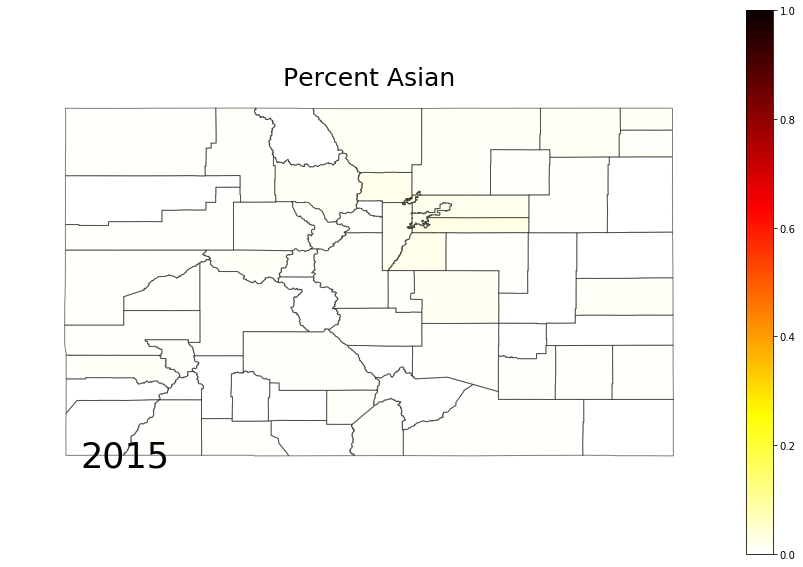

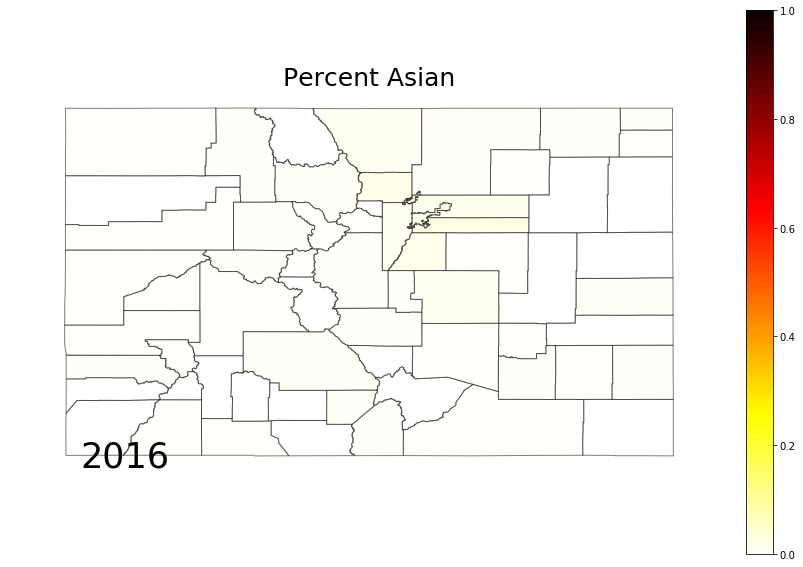

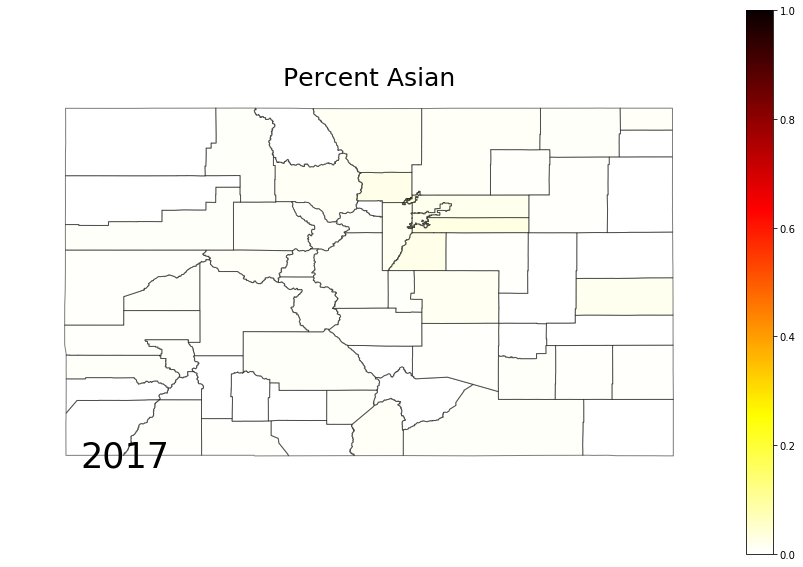

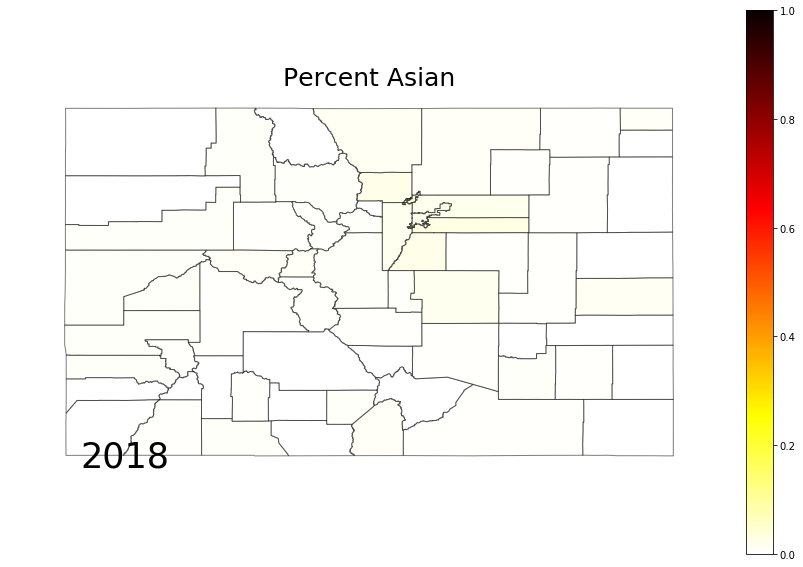

In [109]:
# New visual 
list_of_years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    year_new_A = Asian_gdf[Asian_gdf["year"]==year]
    f,ax = plt.subplots(figsize=(15,10))
    fig = year_new_A.plot(column = 'Percent Asian',
                        cmap = 'hot_r',
                        legend = True,
                        vmin = 0,
                        vmax = 1.0,
                        edgecolor = 'k',
                        alpha = .5,
                        ax=ax)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Percent Asian', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # create an annotation for the year by grabbing the first 4 digits
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    plt.savefig('Asian'+str(year)+'.png')

In [84]:
import imageio
filenames = ['2010.png',"2012.png","2014.png","2016.png","2018.png","2020.png"]
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('Election_map.gif', images)

In [70]:
#https://github.com/ipython/ipython/issues/10045
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [106]:
filenames = ['Native American2010.png','Native American2011.png','Native American2012.png','Native American2013.png','Native American2014.png','Native American2015.png','Native American2016.png','Native American2017.png','Native American2018.png']
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('Native_American_map.gif', images)

In [110]:
filenames = ['Asian2010.png','Asian2011.png','Asian2012.png','Asian2013.png','Asian2014.png','Asian2015.png','Asian2016.png','Asian2017.png','Asian2018.png']
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('Asian_map.gif', images)

In [ ]:
filenames = ['White2010.png','White2011.png','White2012.png','White2013.png','White2014.png','White2015.png','White2016.png','White2017.png','White2018.png']
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('White_map.gif', images)

In [ ]:
filenames = ['Hispanic2010.png','Hispanic2011.png','Hispanic2012.png','Hispanic2013.png','Hispanic2014.png','Hispanic2015.png','Hispanic2016.png','Hispanic2017.png','Hispanic2018.png']
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('Hispanic_map.gif', images)

In [88]:
filenames = ['Female2010.png','Female2011.png','Female2012.png','Female2013.png','Female2014.png','Female2015.png','Female2016.png','Female2017.png','Female2018.png']
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('Female_map.gif', images)

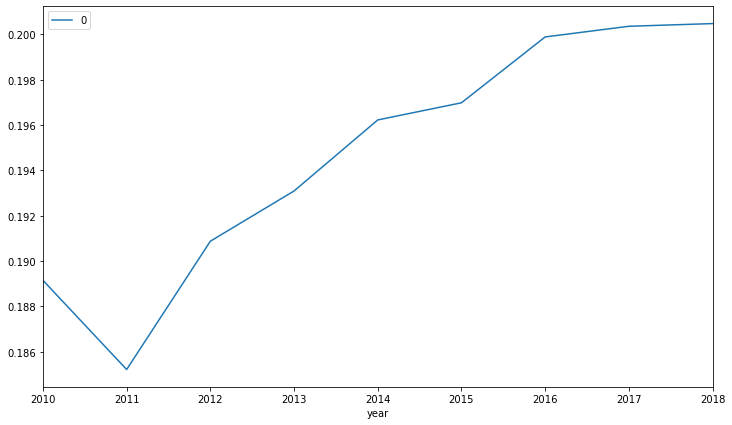

In [17]:
maptime = pd.pivot_table(census_2010_18_gdf,columns='year',values=["Percent Hispanic"])
hispanic_over_years = pd.DataFrame(maptime.stack())
hispanic_over_years = hispanic_over_years.reset_index()
hispanic_over_years = hispanic_over_years.drop(columns="level_0")
hispanic_over_years = hispanic_over_years.set_index(hispanic_over_years["year"])
hispanic_over_years = hispanic_over_years.drop(columns="year")
f,ax = plt.subplots(figsize=(12,7))
hispanic_over_years.plot(ax=ax)

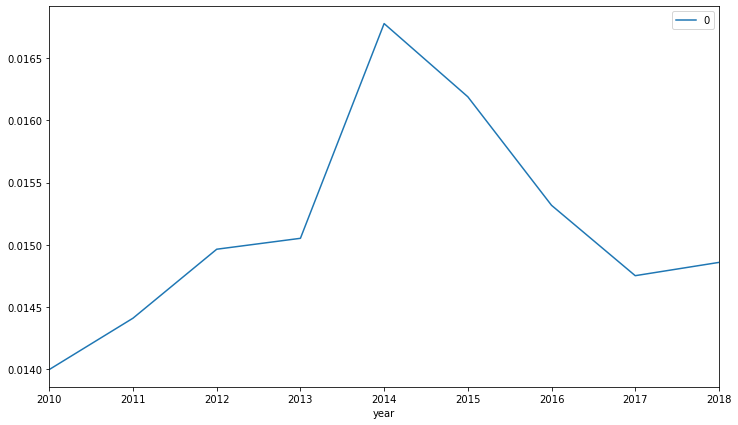

In [18]:
maptime = pd.pivot_table(census_2010_18_gdf,columns='year',values=["Percent Black"])
black_over_years = pd.DataFrame(maptime.stack())
black_over_years = black_over_years.reset_index()
black_over_years = black_over_years.drop(columns="level_0")
black_over_years = black_over_years.set_index(black_over_years["year"])
black_over_years = black_over_years.drop(columns="year")
f,ax = plt.subplots(figsize=(12,7))
black_over_years.plot(ax=ax)

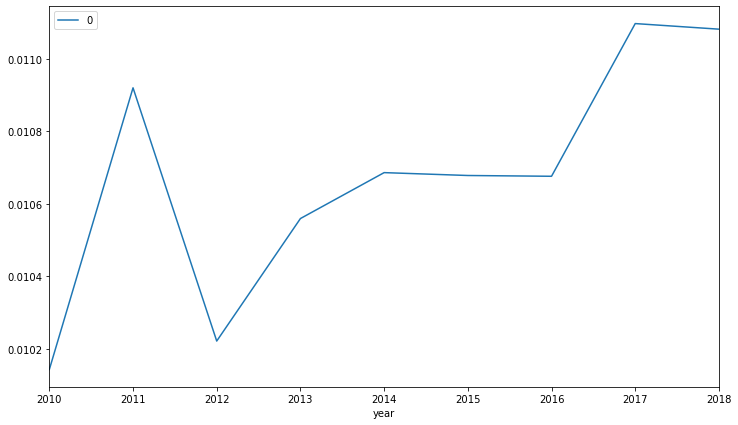

In [19]:
maptime = pd.pivot_table(census_2010_18_gdf,columns='year',values=["Percent Asian"])
asian_over_years = pd.DataFrame(maptime.stack())
asian_over_years = asian_over_years.reset_index()
asian_over_years = asian_over_years.drop(columns="level_0")
asian_over_years = asian_over_years.set_index(asian_over_years["year"])
asian_over_years = asian_over_years.drop(columns="year")
f,ax = plt.subplots(figsize=(12,7))
asian_over_years.plot(ax=ax)

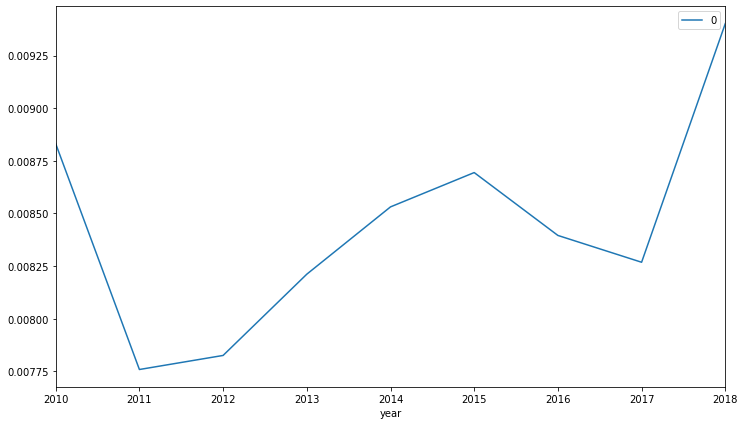

In [94]:
#new plot 
maptime = pd.pivot_table(census_2010_18_gdf,columns='year',values=["Percent Native American"])
NA_over_years = pd.DataFrame(maptime.stack())
NA_over_years = NA_over_years.reset_index()
NA_over_years = NA_over_years.drop(columns="level_0")
NA_over_years = NA_over_years.set_index(NA_over_years["year"])
NA_over_years = NA_over_years.drop(columns="year")
f,ax = plt.subplots(figsize=(12,7))
NA_over_years.plot(ax=ax)

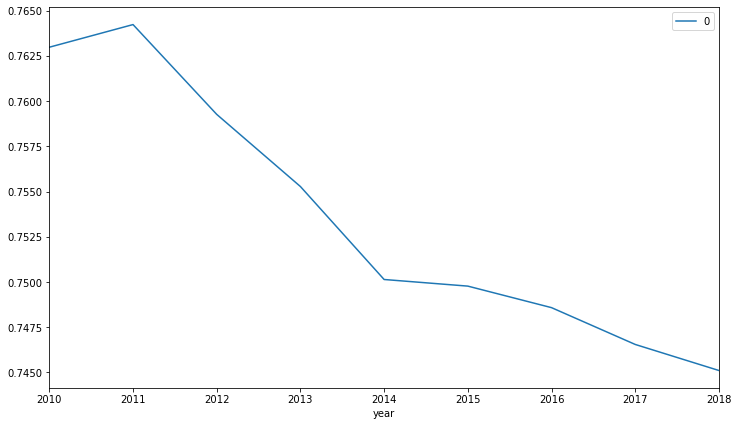

In [95]:
#new plot 
maptime = pd.pivot_table(census_2010_18_gdf,columns='year',values=["Percent White"])
white_over_years = pd.DataFrame(maptime.stack())
white_over_years = white_over_years.reset_index()
white_over_years = white_over_years.drop(columns="level_0")
white_over_years = white_over_years.set_index(white_over_years["year"])
white_over_years = white_over_years.drop(columns="year")
f,ax = plt.subplots(figsize=(12,7))
white_over_years.plot(ax=ax)

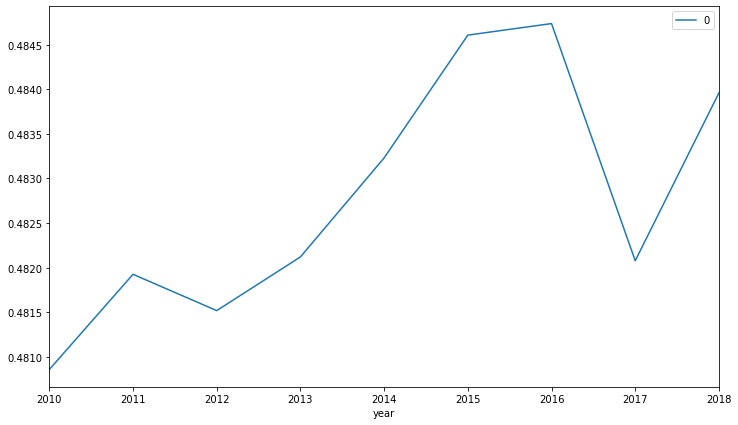

In [20]:
maptime = pd.pivot_table(census_2010_18_gdf,columns='year',values=["Percent Female"])
female_over_years = pd.DataFrame(maptime.stack())
female_over_years = female_over_years.reset_index()
female_over_years = female_over_years.drop(columns="level_0")
female_over_years = female_over_years.set_index(female_over_years["year"])
female_over_years = female_over_years.drop(columns="year")
f,ax = plt.subplots(figsize=(12,7))
female_over_years.plot(ax=ax)

In [85]:
display_gif("Election_map.gif")

In [91]:
display_gif("Hispanic_map.gif")

In [89]:
display_gif("Female_map.gif")

In [102]:
display_gif("White_map.gif")

In [107]:
display_gif("Native_American_map.gif")

In [111]:
display_gif("Asian_map.gif")

# Conclusion 


The research question presented was looking at Historcial demographic voter bases have played a key mesaure in elections both federal and state, looking at demographics of race in the state of colorado by county compared to election results by county, are there any anoimlies we see in trends of votering demographic populations compared to election outcomes of counties? In looking at the data there are some key insights that show that there is no county that follows that trend that goes against what we would expect to see with in terms of demographics and voting blocks by elections, aka meaning Hispanics are notably a voting block for the democratic party and in counties with higher percentages of hispanics tend to lean blue. Now there is another interesting trend in the data and one that fits well with the hypothesis that the State of colorado once red then purple now leaning blue shows us. Looking at the demographics over the year plots show us some insight about how the shift started to take place over the years. For instance, we see White percentage start to decrease over the years and is still on that trend. Then we move over to look at populations like Hispanics whos is increasing at an upward trajectory. We can see an upward trend in Asian and Native American populations as well, leading to the belief that there is a trend to say that there is something to do with demographics and voting partterns. Furthermore, those same counties with those population increases can be seen to reliablly blue. Even though there was no clear counties that presented this trend, we knoew from other knowledge and beliefes that this phenomenon of reliable voting blocks does play into the election predicting and campaigns. 

We can tell from the data and from events in times of politcal campaigns that there was a shift from colorado being red to purple in 2008 and 2012 elections but leaning blue, is because you begin to see the demographics shift and urban population centers boom. This is why we didnt see much campaigning in Colorado in 2020 because it was no longer conisdered a toss-up state to be won by Republicans and no Democratic events like there was in states like Michigan, Georgia, Florida, Arizona, Wisconsin. Any interesting question from this is does the data and furture data suggest that Colorado will be a less important stop on Campaign trails since this trend is already begun? It's not just Colorado that follows this same trend, if the same data analysis were to happen in other states there could be something to say about the same findings. I think a new question proposes from this, given the data and trends, is it a more of question about voter turnout in counties? 

In learning from this data, we can begin to see the shift in not just party officliation and votes, but the shift in the demographics of the sate of Colorado, and agruably the US. We can see the trend of more minority groups growing and the downward trend of white populations in the state of Colorado. There is a shift in which we can see that urban centers are more blue and even counties on the toss up scale are turning out blue. These phenomons raise questions that demogrpahic data alone cant anwser and election resutls. Of course there is limitations of comparing apples to organes in the case of state elections and general elections, whihc could explain some of the county shifts in the two year span. We dont have demographics yet for 2019 and 2020 and before 2010 wasnt presented leading to some limitations about the overall look of the data and trends and shifts. Looking soley at demographics and election votes leaves out many other phenomon like who is running, charisma, turnout, education, economy, healthcare,etc. To complete a more holostic understanding of the shift in colorado politics and arguablly the US as a whole, its worth looking into these other trends to really see if there are other counterpoints to observations above. I would like to study more into this and get that data and look more closely, does the overall trend of what we consider voting blocks of parties stack up to counties in Colorado and if not why, because then that information could be a new variable to further research and study and to add as a feature in understand and predicting elections in the state of Colorado. 